In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

seed = 20
np.random.seed(seed)

tour_type = "hetero_dr_sd_max"
M = [5, 1/10000]
R = [0.4, 1.25]
D = [0.3, 1.25]
W = [.5, .05]

agents = get_agents(homogenous = False, M = M, R = R, D = D, W = W)
#check_parameters(agents)
#compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = None, 
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 11 minutes.


In [5]:
a = pd.DataFrame(tour.strategy_evolution)
a.columns = [col_name.name for col_name in a.columns]
a

,defect,tit_for_tat,generous_tit_for_tat,cooperate
0,25,25,27,23
1,25,25,27,23
2,25,25,27,23
3,25,25,27,23
4,25,26,27,22
5,24,26,27,23
6,25,26,26,23
7,25,26,27,22
8,24,27,27,22
9,24,26,28,22


In [ ]:
distributions_outcomes = outcomes_dict_per_round(tour)
print(round(mean(distributions_outcomes['Exploitation'])/int(len(agents)*(len(agents) - 1) / 2),2))
print(round(mean(distributions_outcomes['Mutual_Cooperation'])/int(len(agents)*(len(agents) - 1) / 2),2))
print(round(mean(distributions_outcomes['Mutual_Defection'])/int(len(agents)*(len(agents) - 1) / 2),2))

In [4]:
df = pd.DataFrame([[c.name, c.m, c.d, c.r, c.w] for c in list(tour.graph.nodes)], columns=['name', 'm', 'd', 'r', 'w']).set_index('name')
df_full = get_outcomes(tour, df)
df_full_pd = pd.DataFrame(df_full)
df_c = pd.concat([df, df_full_pd.T], axis=1)
df_c.head(20)

,m,d,r,w,P,R,S,T
0,5.0,0.21,0.45,0.40,313346,419203,115330,142121
1,5.0,0.22,0.63,0.45,288496,435351,119415,146738
2,5.0,0.63,0.41,0.47,272961,467144,121638,128257
3,5.0,0.98,0.38,0.49,271826,458811,129821,129542
4,5.0,0.25,0.11,0.56,262324,467946,136230,123500
5,5.0,0.77,0.96,0.44,299962,442354,113757,133927
6,5.0,0.17,0.76,0.52,326331,413141,105413,145115
7,5.0,0.32,0.78,0.58,273180,461646,133464,121710
8,5.0,0.73,0.27,0.57,297796,433873,115188,143143
9,5.0,0.47,0.63,0.58,253812,478704,133096,124388


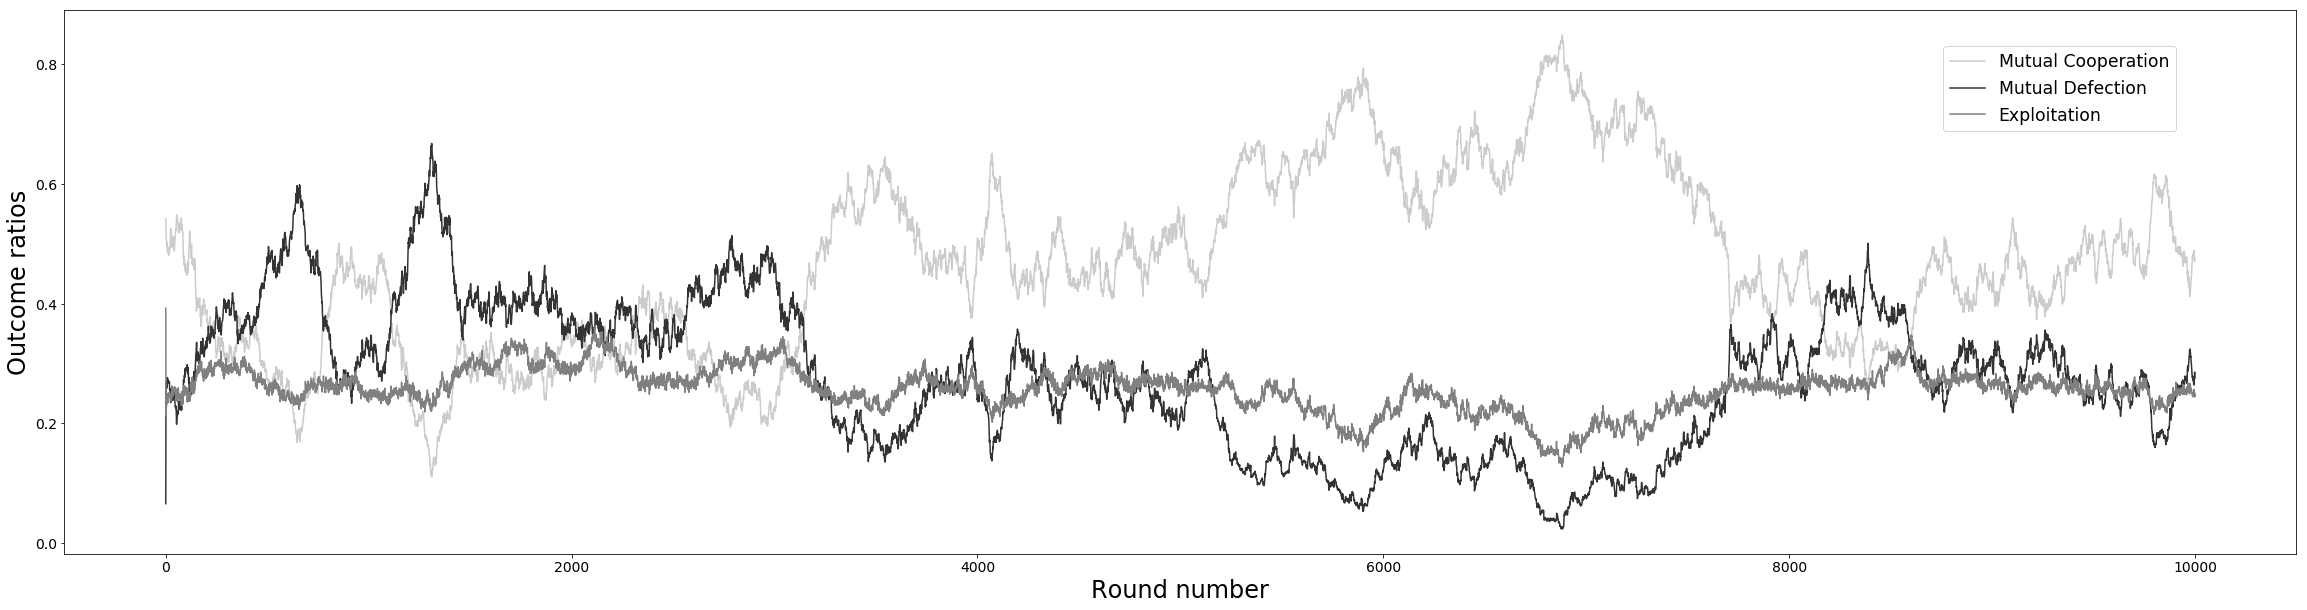

In [3]:
outcome_ratios_per_round(tour)

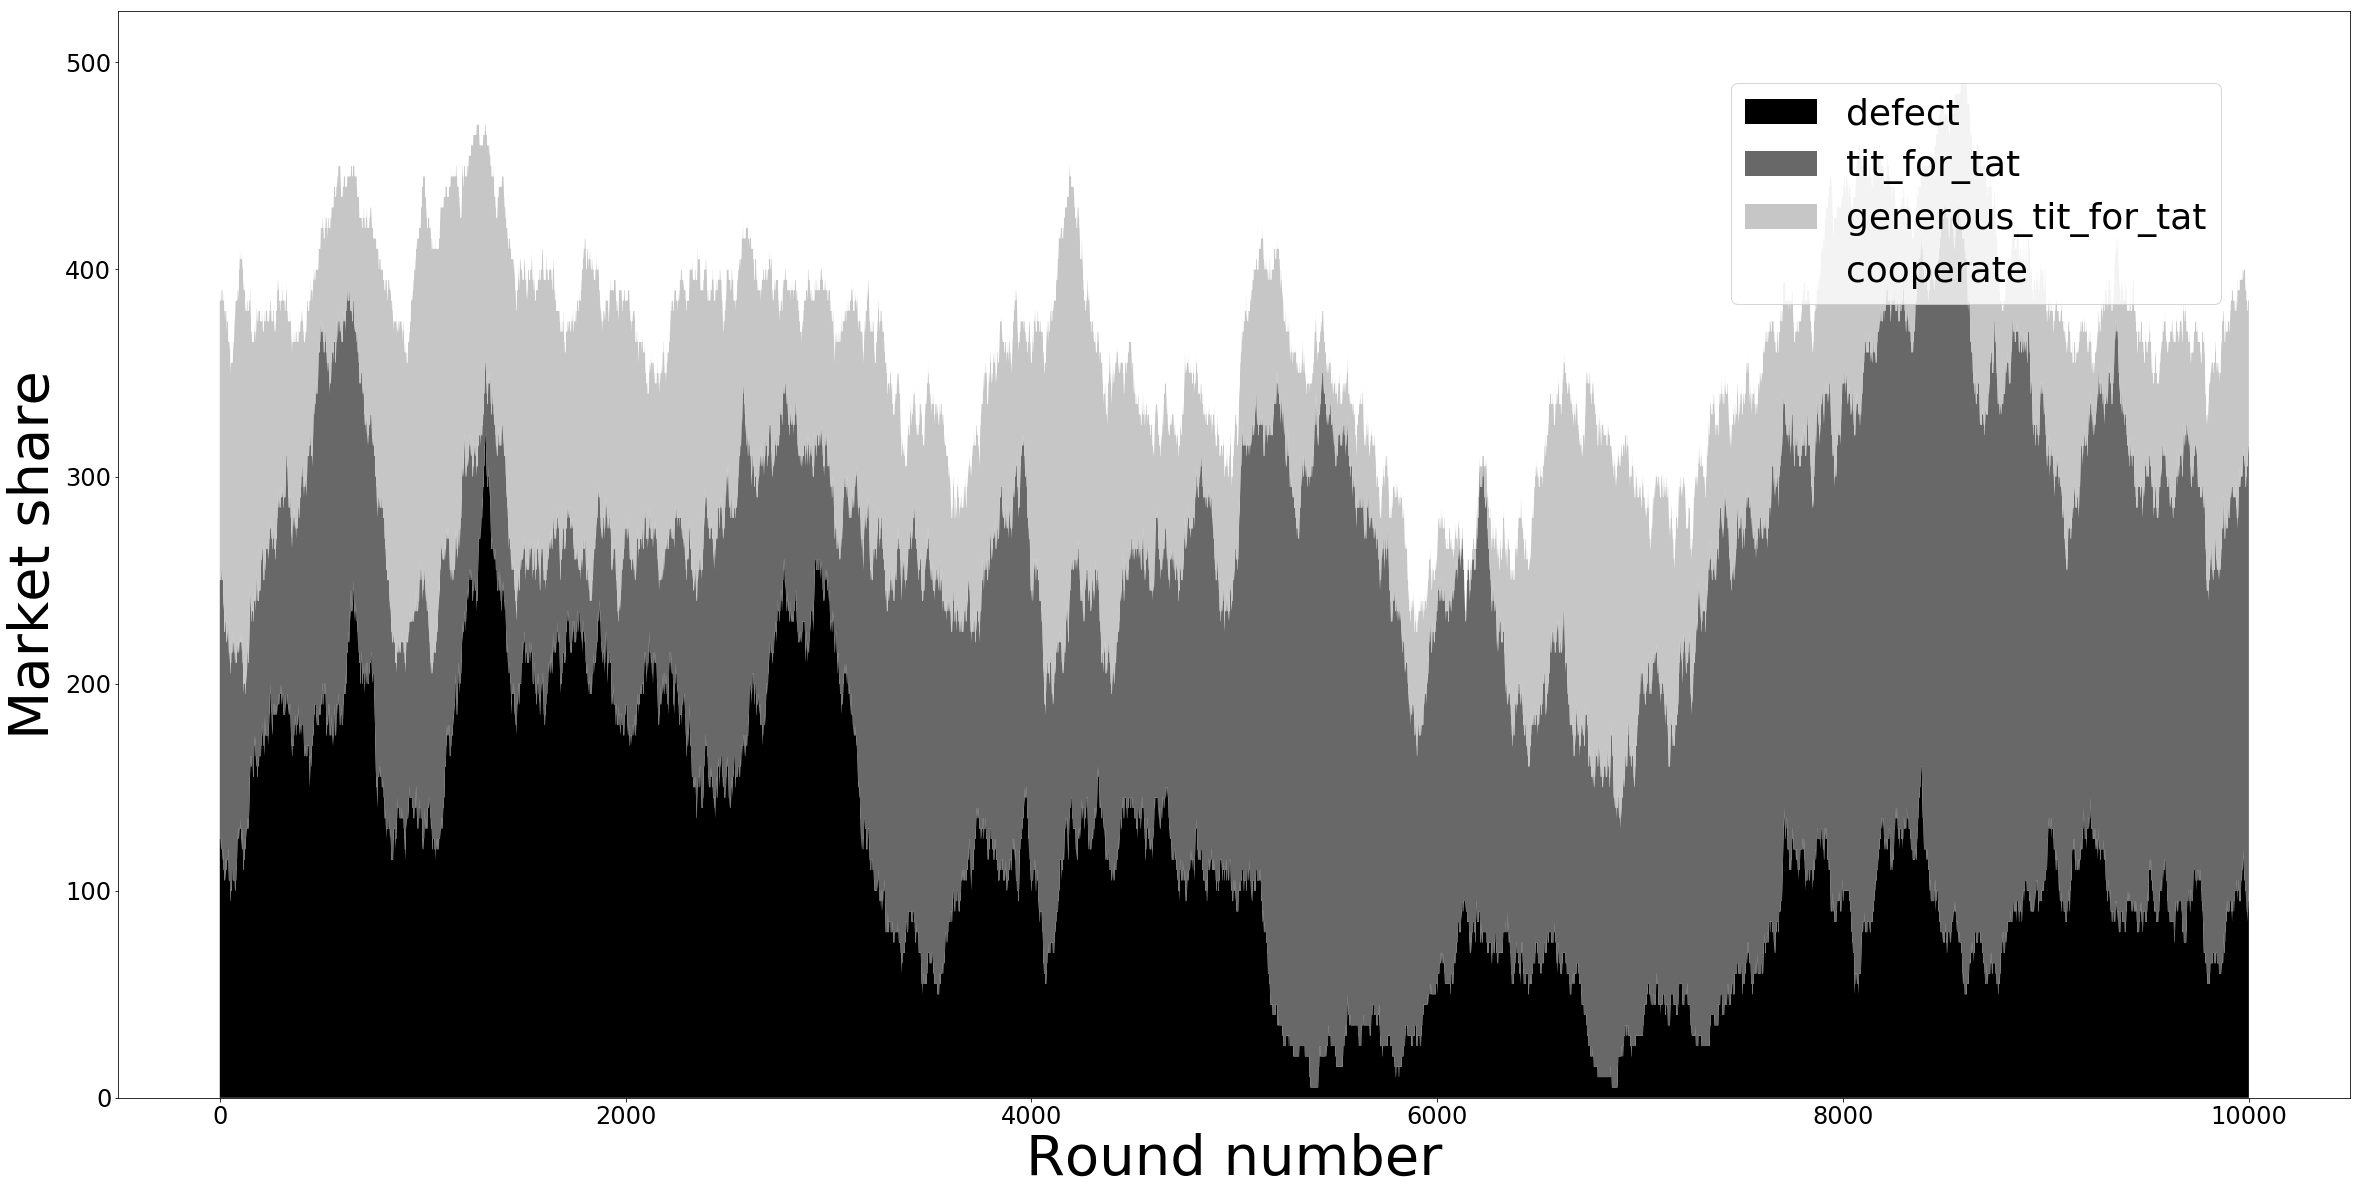

In [2]:
draw_stack(tour)